## Uncertainty = 1) Aleatoric Uncertainty + 2) Epistemic Uncertainty
- 1) Aleatoric Uncertainty (; due to "Data")
- 2) Epistemic Uncertainty (; due to "Model" + "often a lack of training data")

## Bayesian Deep Learning 

### MC Dropout -> Aleatoric Uncertainty 측정

- 1. Train Phase: Dropout "on"
- 2. Inference Phase: Dropout "on" (마지막 부근 layer의 dropout 1개 또는 2개 정도 "on" / "0.1 ~ 0.5")
- (만약 사용하는 모델의 마지막 부근 layer에 Dropout이 없으면, Dropout을 추가하고 Train 단계에서는 "off", Inference 단계에서 "on")
- 3. Inference number: 50 ~ 100회

## Heatmap

In [1]:
import tensorflow as tf 

from glob import glob 
import cv2 
import numpy as np 
from skimage import io
import matplotlib.pyplot as plt


import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [2]:
dl_model = tf.keras.models.load_model('C:/Users/user/Desktop/models/child_segmentation/total_layer.h5', 
                                      custom_objects={'binary_crossentropy_plus_jaccard_loss': sm.losses.bce_jaccard_loss, 'iou_score' : sm.metrics.iou_score, 'f1-score' : sm.metrics.f1_score})

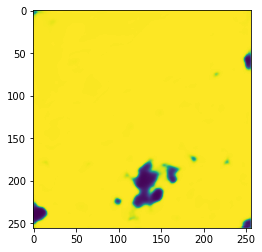

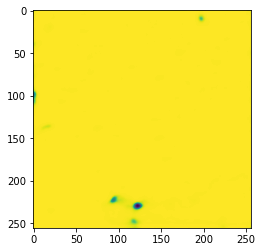

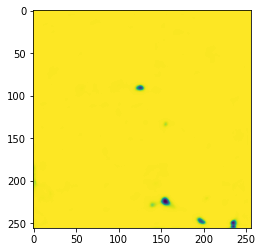

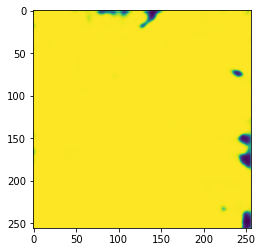

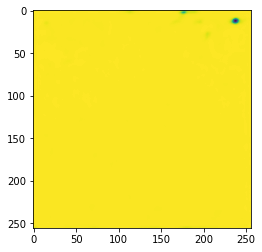

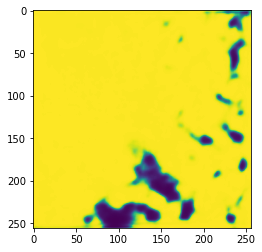

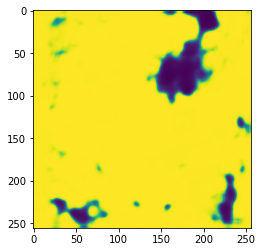

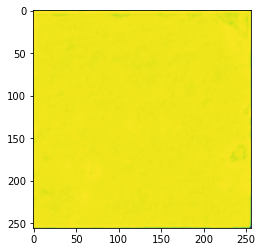

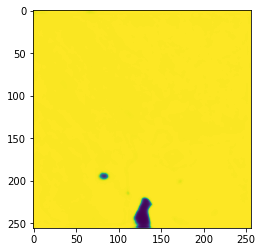

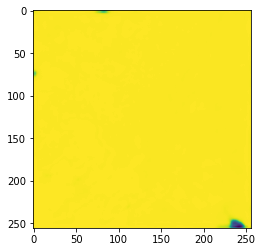

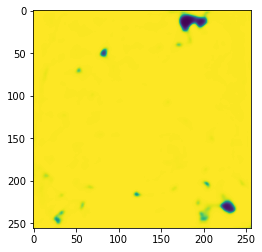

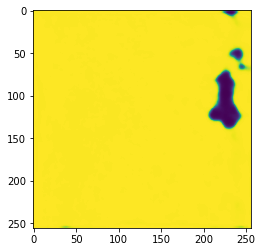

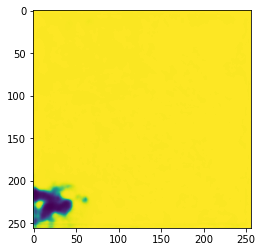

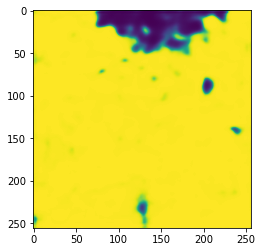

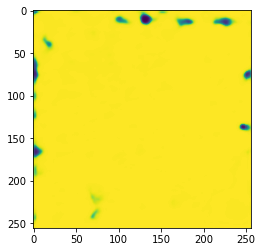

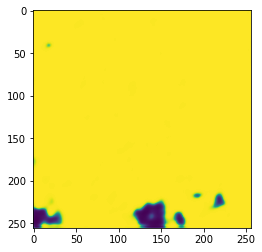

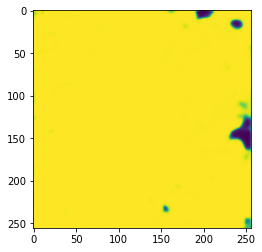

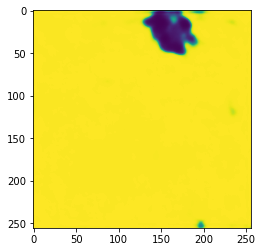

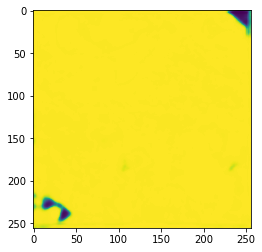

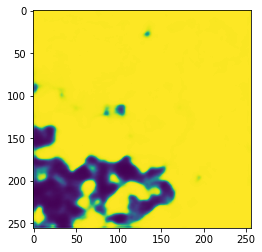

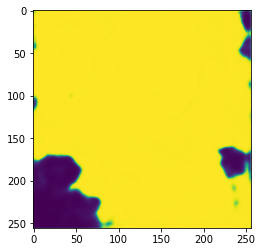

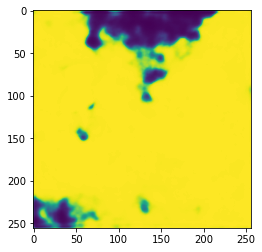

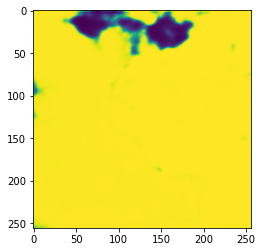

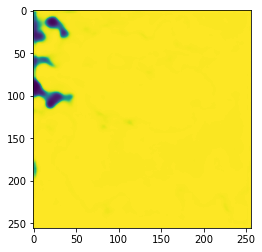

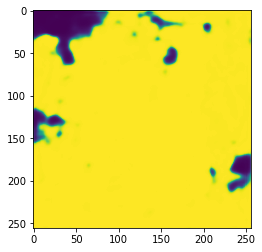

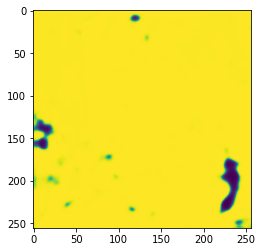

In [7]:
""" 예측한 Segmentation 결과를 폴더에서 불러와서 Heatmap을 그려줌 """
test_dir = 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0'
pred_dir = 'C:/Users/user/Desktop/models/child_segmentation/pred_images/'



In [ ]:

test_imgs = sorted(glob(test_dir + '/*.jpg'))

for img in test_imgs: 
    # print(img)
    img_name = img
    img = cv2.imread(img, 1)
    img = cv2.resize(img, (256, 256)) / 255.
    # print(img.shape)
    # print(np.expand_dims(img, axis=0).shape)
    pred_img = dl_model.predict(np.expand_dims(img, axis=0))
    # print(img.shape)
    pred_img = np.squeeze(pred_img, axis=0)
    
    plt.imshow(pred_img)
    plt.show()
    
    pred_img = cv2.normalize(pred_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    # print(pred_img.shape)
    cv2.imwrite(pred_dir + img_name[-8:], pred_img)


In [15]:
for i in range(1, 10):
    print(i)

1
2
3
4
5
6
7
8
9


In [13]:
test_pred_imgs = sorted(glob(pred_dir + '/*.jpg'))
heatmap_dir = 'C:/Users/user/Desktop/models/child_segmentation/heatmap/'
img_size = 256
inference_num = 10 ## inference 횟수

ni_list = []
for ni in range(1, int(len(test_pred_imgs)/inference_num)+1):
    ni_list.append(inference_num*ni-1)

print(ni_list)    

heatmap_img_list = []    
heatmap_img = np.zeros((img_size,img_size), np.uint8)
for i in range(len(test_pred_imgs)):
    # print(1)
    pred_img = cv2.imread(test_pred_imgs[i],0)  
    heatmap_img = np.add(heatmap_img, pred_img)
    
    for ni in ni_list:
        if i == ni:
            new_heatmap = 255-(heatmap_img/inference_num)
            heatmap_img_list.append(new_heatmap)
            heatmap_img = np.zeros((img_size,img_size), np.uint8)
                  
            # """ Save """
            plt.imsave(heatmap_dir + 'heatmap_' + str(test_pred_imgs[i][-8:-5]) + '.png', new_heatmap, cmap='OrRd')



[9, 19]


In [15]:
test_pred_imgs

['C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\6621.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\6646.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\6756.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\6908.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\7012.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\7101.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\7153.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\7228.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Intersect_0.85/Atopy_Segment_Test/Grade0\\7244.png',
 'C:/Users/user/Desktop/datasets/Atopy Segmentation/Int

In [10]:
len(test_pred_imgs)

26

## Evaluation Metrics

- Table1. Pixel acc, Mean accurcy, Dice Coefficient
- Table2. p(acc|certain), p(uncertain|inacc), PAvPU